# CSCI 3220: Python for Data Science and AI

## Assignment 2

## Due Date: March 17(Wednesday), 11:59 PM

## Total Points: 16X2 = 32

## Bonus Points: 5X2 = 10


#### ***Write the code in Jupyter notebook (ipynb file) with proper comments. 
#### ***Add proper citation if you take help from a different source (not from the textbook).
#### ***Rename the file with your student ID and submit it in Moodle.
#### ***(No. of lines : #) shows the minimum number of lines required to do the corresponding task.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import impute
import numpy as np

## 1.	Read the dataset (CSV file) and create a DataFrame. (No. of lines : 1)

In [2]:
frame = pd.read_csv("train.csv")

## 2.	Display the first five rows of the DataFrame. (No. of lines : 1)

In [3]:
frame.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3.	Print the number of rows and columns.(No. of lines : 1)

In [4]:
("(%s, %s)" %(frame.index.stop,len(frame.columns)))

'(1460, 81)'

## 4.	Display the name of columns/features, Non-Null Count, Dtype. (No. of lines : 1)

In [5]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 5.	Print the overall statistics for each column in the DataFrame. (No. of lines : 1)

In [6]:
frame.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 6.	Print the statistics for the “SalePrice” column.(No. of lines : 1)

In [7]:
frame.describe().SalePrice

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## 7.	Print the name of the columns.(No. of lines : 1)

In [8]:
frame.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 8.	Print the number of missing values for each column and draw a figure to display the number of missing values for each column. (No. of lines : 7)

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


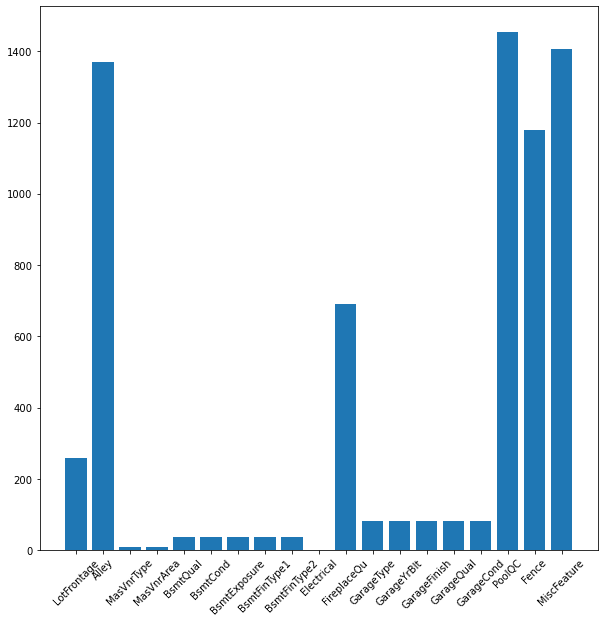

In [9]:
missingvals = frame.isnull().sum()
missingvals = missingvals[missingvals > 0]
print(missingvals)

#Citation: Learned how to rotatate tickers from StackAbuse
#Link: https://stackabuse.com/rotate-axis-labels-in-matplotlib/
plt.figure(figsize=(10, 10))
plt.xticks(rotation = 45)
plt.bar(missingvals.index, missingvals.values)
plt.grid(False)

## 9.	Create two new DataFrames. One for Categorical features and one for numerical features. For each DataFrame, print the name of the columns and DataFrame . (No. of lines : 6)

In [10]:
#Couldn't make indexing for "int32" and "int64" types work so I assumed that every non-object is numerical
num_frame_indexes = frame.columns[frame.dtypes != object]
print(num_frame_indexes)

num_frame = frame[num_frame_indexes].head()
num_frame

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [11]:
cat_frame_indexes = frame.columns[frame.dtypes == object]
print(cat_frame_indexes)

cat_frame = frame[cat_frame_indexes].head()
cat_frame

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## 10.	Calculate the correlation for the pair of numerical features. Draw a heatmap diagram to display only the pairs where the correlation is greater than 0.8. Encode the result as 0 (corr<0.7) and 1 (corr>0.7).  (No. of lines : 3)

<AxesSubplot:>

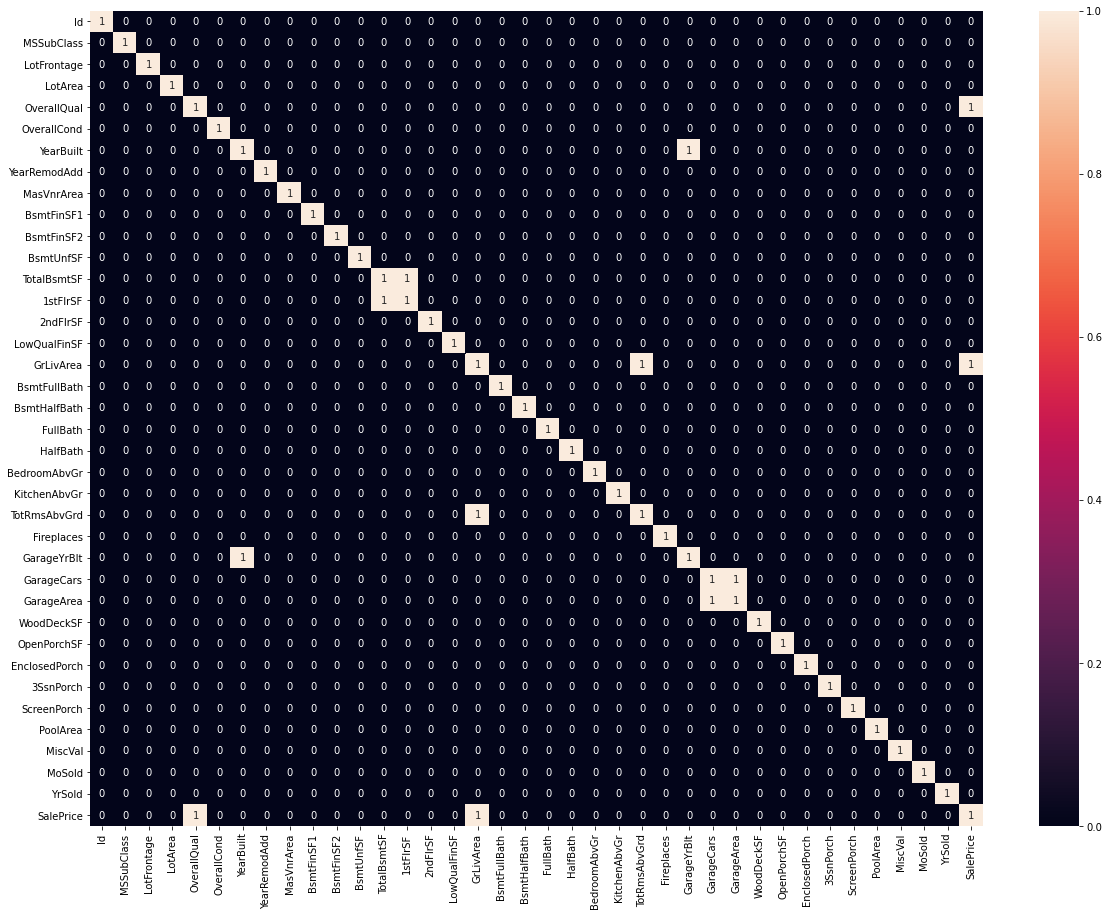

In [12]:
plt.figure(figsize=(20, 15))

corr_frame = frame.corr()
corr_frame[corr_frame > 0.7] = 1
corr_frame[corr_frame < 0.7] = 0

sns.heatmap(corr_frame, annot=True)

## 11.	Draw a histogram plot for feature “GrLivArea”   (No. of lines : 1)

<AxesSubplot:xlabel='GrLivArea', ylabel='Count'>

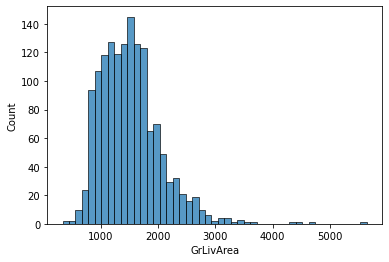

In [13]:
#plt.hist(frame["GrLivArea"].values, bins = np.arange(0, 5500, 90))

sns.histplot(frame["GrLivArea"])

## 12.	Draw a scatter plot for feature “GrLivArea” on the x-axis and “SalePrice” on the y-axis. (No. of lines : 1)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

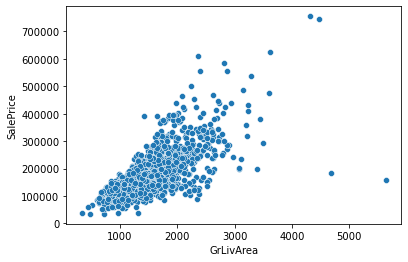

In [14]:
"""x = frame["GrLivArea"].values
y = frame["SalePrice"].values

plt.scatter(x,y,edgecolors="white")"""

plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
sns.scatterplot(x = frame["GrLivArea"].values, y = frame["SalePrice"].values)

## 13.	Draw a count plot for feature “Neighborhood” (No. of lines : 1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

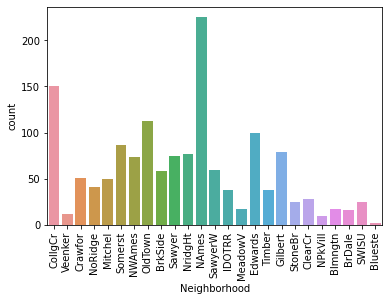

In [15]:
plt.xticks(rotation = 90)
plt.xlabel("Neighborhood")
sns.countplot(frame["Neighborhood"].values)

## 14.	Use a “SimpleImputer” method from the sci-kit learn library to impute the missing values in the DataFrame with numerical features. Print the first five rows in DataFrame.
 https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html (No. of lines : 4)


In [16]:
#Citation: Received help with making imputer work from YouTube video
#Link: https://www.youtube.com/watch?v=GFnwvZVCMro

from sklearn.impute import SimpleImputer #Not catched during first imports in first cell
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(num_frame.iloc[1:, :])
num_frame = pd.DataFrame(imputer.transform(num_frame.iloc[:, :]), columns = num_frame.columns)

num_frame.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


## 15.	For categorical features, fill up the missing values with a string “Empty”. Print the first five rows in DataFrame. (No. of lines : 2)

In [17]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="Empty")

imputer.fit(cat_frame.iloc[:, :])
cat_frame = pd.DataFrame(imputer.transform(cat_frame.iloc[:, :]), columns = cat_frame.columns)

cat_frame.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Empty,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Empty,Empty,Empty,WD,Normal
1,RL,Pave,Empty,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,Empty,Empty,Empty,WD,Normal
2,RL,Pave,Empty,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Empty,Empty,Empty,WD,Normal
3,RL,Pave,Empty,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,Empty,Empty,Empty,WD,Abnorml
4,RL,Pave,Empty,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,Empty,Empty,Empty,WD,Normal


## 16.	Concatenate the two DataFrames (categorical and numerical) to create a new DataFrame. Display the concatenated DataFrame. Print the number of missing values for each column to make sure there are no missing values. (No. of lines : 5)

## 17.	(Bonus Points) Encode the categorical features using the following library:
https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features


## 18.	(Bonus Points) Create a profiling report (Html) for the given dataset using the pandas-profiling library.
 https://github.com/pandas-profiling/pandas-profiling
